# Twitter Analysis

## Working with the sample of the data

To get started, you find 1,000 tweets in `tweets.csv` in the same folder as the notebook.

In [1]:
%matplotlib inline

import sys
sys.path.append("..")


from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.shared import read_parquet_in_date_chunks

In [2]:
df = pd.read_csv(
    "tweets.csv",
    index_col="id",
    parse_dates=["date"],
    infer_datetime_format=True,
)

Here are some general statistics from the data.

In [3]:
df.shape

(1000, 14)

In [4]:
df.columns

Index(['username', 'to', 'text', 'retweets', 'favorites', 'replies',
       'permalink', 'author_id', 'date', 'hashtags', 'mentions', 'urls',
       'state', 'city'],
      dtype='object')

In [5]:
df.head(5)

,username,to,text,retweets,favorites,replies,permalink,author_id,date,hashtags,mentions,urls,state,city
id,,,,,,,,,,,,,,
1238819922941272064,5n1pp3r5,NaN,Aufgrund der Panik rund um #Corona könnte man ...,0.0,0.0,0.0,https://twitter.com/5n1pp3r5/status/1238819922...,8.064796e+07,2020-03-14 13:31:00+00:00,#Corona,NaN,NaN,Rheinland-Pfalz,Koblenz
1246357996692783104,Adrian_Willig,NaN,So hat sich das Verhalten der Deutschen durch ...,0.0,0.0,0.0,https://twitter.com/Adrian_Willig/status/12463...,1.273438e+09,2020-04-04 08:44:37+00:00,NaN,NaN,https://www.handelsblatt.com/25713066.html?sha...,Hamburg,Hamburg
1248495455148756994,merkelfisch,NaN,"Wer indische Götterfiguren an Tempeln kennt, a...",0.0,0.0,0.0,https://twitter.com/merkelfisch/status/1248495...,1.166727e+18,2020-04-10 06:18:07+00:00,NaN,NaN,NaN,Berlin,Berlin
1242318886181142528,ZDFheute,NaN,Ein Land im Shutdown: In #Italien gibt es deut...,18.0,78.0,25.0,https://twitter.com/ZDFheute/status/1242318886...,1.101354e+09,2020-03-24 05:14:38+00:00,#Italien #Coronavirus #Covid19,NaN,https://www.zdf.de/nachrichten/politik/coronav...,Hessen,Wiesbaden
1241426351309062145,DocGoy_com,NaN,RT docgoy: Eigentlich ist es dafür schon zu sp...,0.0,0.0,0.0,https://twitter.com/DocGoy_com/status/12414263...,6.118681e+07,2020-03-21 18:08:01+00:00,#Corona #COVID #SARS #Prepper,NaN,https://blog.twitt-erfolg.de/2020/03/eigentlic...,Niedersachsen,Niedersachsen


In [6]:
df.describe()

,retweets,favorites,replies,author_id
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,3.574000,19.377000,1.264000,2.689278e+17
std,33.932402,220.627104,7.509774,4.497346e+17
min,0.000000,0.000000,0.000000,4.146830e+05
25%,0.000000,0.000000,0.000000,7.963207e+07
50%,0.000000,1.000000,0.000000,9.139903e+08
75%,1.000000,3.000000,1.000000,7.315124e+17
max,826.000000,5294.000000,156.000000,1.248712e+18


### Tweets over time

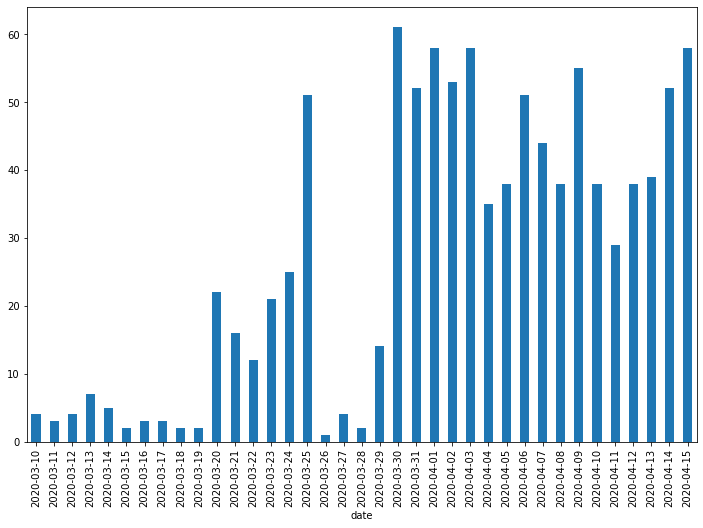

In [7]:
df.groupby(df.date.dt.date).size().plot.bar(figsize=(12, 8))

### Hashtags over time

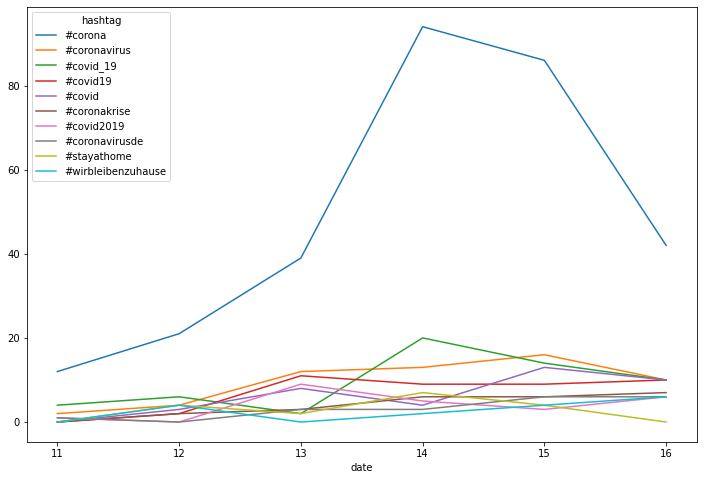

In [8]:
hashtags = df.hashtags.str.split(" ", expand=True).reset_index()
hashtags = (
    hashtags.melt(id_vars="id", value_vars=range(21), value_name="hashtag")
    .drop(columns="variable")
    .dropna()
)    
hashtags = hashtags.merge(df["date"], on="id").drop(columns="id")
hashtags["hashtag"] = hashtags["hashtag"].str.lower()
top_twenty_hashtags = hashtags.hashtag.value_counts()[:10].index
hashtags.groupby(hashtags.date.dt.week)["hashtag"].value_counts().unstack().fillna(0)[top_twenty_hashtags].plot(figsize=(12, 8))

## Working with the complete corpus

To work with the whole corpus of collected tweets, you need to contact us to gain access. Here are some descriptives.

In [9]:
df = read_parquet_in_date_chunks("../bld/out/data/tweets-cleaned")

In [10]:
df.head(5)

,username,to,text,retweets,favorites,replies,permalink,author_id,date,hashtags,mentions,urls,state,city
id,,,,,,,,,,,,,,
1237467210949505024,offpulse,None,Der Fux‘n gibt sich jetzt mexikanisch: #RheinR...,0.0,0.0,1.0,https://twitter.com/offpulse/status/1237467210...,2.836726e+08,2020-03-10 19:55:48+00:00,#RheinRuhrTreff #Kolping #Bubenabend,None,https://www.swarmapp.com/c/cGr85JWKMeq,Baden-Wuerttemberg,Freiburg im Breisgau
1237444332795412482,PauleHeyman,BB_Ger,#Corona is ja Egtl jetzt DIE CHANCE für sat1 d...,0.0,0.0,0.0,https://twitter.com/PauleHeyman/status/1237444...,1.251627e+08,2020-03-10 18:24:54+00:00,#Corona #BigFail,None,https://twitter.com/BB_Ger/status/123728763058...,Baden-Wuerttemberg,Freiburg im Breisgau
1237485564309487622,MagicManShow,None,"Es ist unsere Verantwortung, diejenigen Mensch...",0.0,1.0,1.0,https://twitter.com/MagicManShow/status/123748...,4.553677e+07,2020-03-10 21:08:44+00:00,None,None,https://www.tagesspiegel.de/gesellschaft/panor...,Baden-Wuerttemberg,Freiburg im Breisgau
1237392844802801668,BinesBastelstu1,BinesBastelstu1,Zumal die 1000 eine rein willkürliche Zahl ist...,1.0,1.0,2.0,https://twitter.com/BinesBastelstu1/status/123...,1.060280e+18,2020-03-10 15:00:18+00:00,None,None,None,Baden-Wuerttemberg,Heidelberg
1237360752526348288,in_Hemsbach,None,@g7 diebundesregierung Um die Dynamik der Coro...,0.0,0.0,0.0,https://twitter.com/in_Hemsbach/status/1237360...,1.639781e+09,2020-03-10 12:52:47+00:00,None,@G7,https://www.instagram.com/p/B9jcYX_oP7A/?igshi...,Baden-Wuerttemberg,Heidelberg


In [11]:
df.describe()

,retweets,favorites,replies,author_id
count,191800.000000,191800.000000,191800.000000,1.918000e+05
mean,2.299479,9.600845,1.116731,2.810279e+17
std,26.364300,128.223922,8.944902,4.539639e+17
min,0.000000,0.000000,0.000000,2.737000e+03
25%,0.000000,0.000000,0.000000,7.473429e+07
50%,0.000000,1.000000,0.000000,7.877746e+08
75%,1.000000,3.000000,1.000000,7.664104e+17
max,5373.000000,22488.000000,1195.000000,1.250482e+18


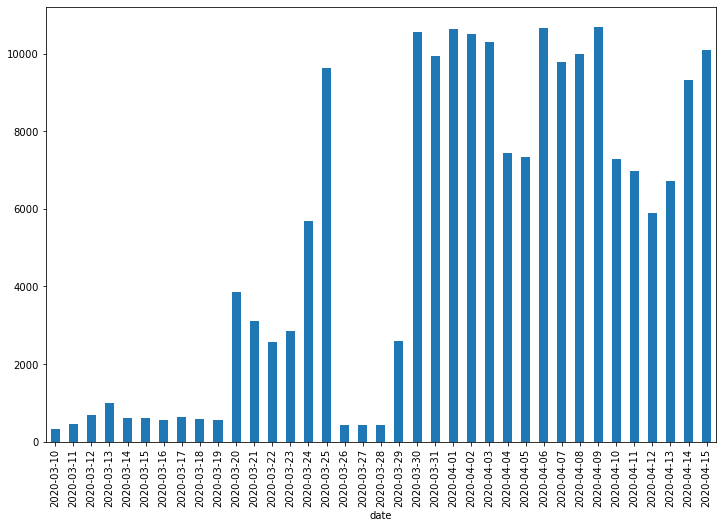

In [12]:
df.groupby(df.date.dt.date).size().plot.bar(figsize=(12, 8))

In [13]:
df.sample(1000, random_state=1).to_csv("tweets.csv")